START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Microcosm

In [2]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
zl = soil_height1 = 20  # Mixing layer depth in mm

### Soil - Hydrological Characteristics

In [3]:
''' Hydrological controlling parameters'''

porosity_vine = 0.55  # Vinyard soil
kSat_vine = 17.62/60  # mm/min (17.62 cm/h - Rouffach 
# (Martine Trautmann, sampled pre-event)

ov_1 = 0.21   # Initial water content m3. m-3
ovSat_vine = 0.55  # Saturated water content (assumed)
psi_vine = 1100  # soil suction Rouffach (guess) mm


# Results

## Hydrology - 1st pulse

In [4]:
water_data = leachsim(ovSat=ovSat_vine,
                      kSat=kSat_vine,
                      ov = ov_1,
                      psi=psi_vine,
                      soil_height=soil_height1)

# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, 
                          cum_leach_55mmh, 
                          cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, 
                          cum_roff_55mmh, 
                          cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, 
                         infil_55mmh, 
                         infil_30mmh)

time_size_135mmh = water_data[:, 19]
time_size_55mmhA = water_data[:, 20]
time_size_55mmhB = water_data[:, 20]
time_size_30mmh = water_data[:, 21]

time_sizes1 = [time_size_135mmh, time_size_135mmh,
               time_size_55mmhA, time_size_55mmhA,
               time_size_55mmhB, time_size_55mmhB,
               time_size_30mmh, time_size_30mmh]

""" Observed Hydrlogy Vineyard """
leach_high_6min = np.array([13.609, 13.610, 17.676, 17.705])  # all at 6 min
leach_med_12min = np.array([13.787, 11.112, 11.858, 11.294])  # all at 12 min
leach_med_30min = np.array([48.185, 46.402, 48.164, 47.032])  # all at 30min
leach_low_30min = np.array([22.595, 19.082, 21.285, 20.871])  # all at 30min


Mass balance 0.0
Mass balance 0.0
Mass balance 0.0


In [5]:
#hydroplot(percol_data1, 
#          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
#          leach_high_6min, 
#          leach_med_12min, leach_med_30min, 
#          leach_low_30min,
#          "Leached Volume [mL] - Vine Soil 1st Pulse")

## Transport - 1st pulse

** Initial and observed mass in leachate and ponding **

In [6]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs)
smVn_dict_S_1st = {
    'a_high_0d': (7343.7, 148.5, 'nan'),
    'b_high_1d': (3052.6, 111.5, 'nan'),
    'c_med12_0d': (7343.7, 160.1, 'nan'),
    'd_med12_1d': (3052.6, 110.7, 'nan'),
    'e_med30_0d': (7343.7, 188.3, 'nan'),
    'f_med30_1d': (3052.6, 235.8, 'nan'),
    'g_low_0d': (7343.7, 237.4, 'nan'),
    'h_low_1d': (3052.6, 142.8, 'nan')
}

smVn_dict_L_1st = {
    'a_high_0d': (4038.5, 111.8, 'nan'),
    'b_high_1d': (4904.5, 37.2, 'nan'),
    'c_med12_0d': (4038.5, 111.3, 'nan'),
    'd_med12_1d': (4904.5, 79.3, 'nan'),
    'e_med30_0d': (4038.5, 278.4, 'nan'),
    'f_med30_1d': (4904.5, 156.1, 'nan'),
    'g_low_0d': (4038.5, 142.0, 'nan'),
    'h_low_1d': (4904.5, 134.7, 'nan')
}

#### Soil transport Charachteristics

In [7]:
# Soil characteristics
pb_vine = 1.04/10**3  # bulk density (g/cm^3) 
# g/mm^3, Rouffach (Martine Trautmann, sampled pre-event)

porosity_vine = 0.55  # Vinyard soil

# Assumed (used to calculate Reynolds number)
runoff_vel = 20.0  # mm/min

# Fraction organic matter and carbon (Scenario 1)
fom_vine_sterile = 3.53/100.0
fom_vine_untreat = 2.93/100.0
foc_vine_sterile = 0.58*fom_vine_sterile
foc_vine_untreat = 0.58*fom_vine_untreat

### S-metolachlor Properties

In [9]:
# Koc Ranges (EU COmmision SANCO/1426/2001 - rev. 3. 4 October 2004)
Koc_smeto = [369, 200, 110, 21]  # [ml/g]
Koc_smeto = np.array(Koc_smeto)*10**3

# Kd (S-metolachlor)
Kd_smeto_vine_sterile1 = Koc_smeto[0] * foc_vine_sterile  # ml/g
Kd_smeto_vine_untreat1 = Koc_smeto[0] * foc_vine_untreat
Kd_smeto_vine_sterile2 = Koc_smeto[1] * foc_vine_sterile  # ml/g
Kd_smeto_vine_untreat2 = Koc_smeto[1] * foc_vine_untreat
Kd_smeto_vine_sterile3 = Koc_smeto[2] * foc_vine_sterile  # ml/g
Kd_smeto_vine_untreat3 = Koc_smeto[2] * foc_vine_untreat
Kd_smeto_vine_sterile4 = Koc_smeto[3] * foc_vine_sterile  # ml/g
Kd_smeto_vine_untreat4 = Koc_smeto[3] * foc_vine_untreat

Kd_smeto_sterile = [Kd_smeto_vine_sterile1,
                    Kd_smeto_vine_sterile2,
                    Kd_smeto_vine_sterile3,
                    Kd_smeto_vine_sterile4]

Kd_smeto_living = [Kd_smeto_vine_untreat1,
                   Kd_smeto_vine_untreat2,
                   Kd_smeto_vine_untreat3,
                   Kd_smeto_vine_untreat4]

In [10]:
# kd_array = np.asarray(Kd_mexyl_sterile)
# np.log10(kd_array)

### Computation transport - 1st pulse

In [11]:
# Any length unit input must be: "mm"
pest_sterile_1st = pest_test3(
    Kd_smeto_sterile,
    smVn_dict_S_1st,          
    pb_vine,
    ovSat_vine,
    percol_data1, percol_data1,
    runoff_data1, runoff_data1, 
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    KFILM = True,
    first_cycle = True)

Best log Kd:  3.8782290651098204 ( Num:  1 ) 
 Error:  1.11364261863 , R2:  -8.1700007275
SSres:  159270.338273
SStot:  17368.62875
mean mass:  166.88750000000002 sum_mass: 1335.1000000000001


In [12]:
# Any length unit input must be: "mm"

pest_living_1st = pest_test3(
    Kd_smeto_living,
    smVn_dict_L_1st,          
    pb_vine,
    ovSat_vine,
    percol_data1, percol_data1,
    runoff_data1, runoff_data1, 
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    KFILM = True,
    first_cycle = True)

Best log Kd:  3.797321980076107 ( Num:  1 ) 
 Error:  0.504713126223 , R2:  -2.41485556617
SSres:  118558.799568
SStot:  34718.53999999999
mean mass:  131.35 sum_mass: 1050.8


#### Sterile time series

In [13]:
# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_1st[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_1st[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_1st[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_1st[:, 9]
high_1d_overmass_dt = pest_sterile_1st[:, 10]
med12_0d_overmass_dt = pest_sterile_1st[:, 11]
med12_1d_overmass_dt = pest_sterile_1st[:, 12]

med30_0d_overmass_dt = pest_sterile_1st[:, 13]
med30_1d_overmass_dt = pest_sterile_1st[:, 14]
low_0d_overmass_dt = pest_sterile_1st[:, 15]
low_1d_overmass_dt = pest_sterile_1st[:, 16]


mass_percol_sterile1 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt,
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt,
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile1 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)

#### Living  time series

In [14]:
# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_living_1st[:, 1]
high_1d_cum_mass_out_dt = pest_living_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_living_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_living_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_living_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_living_1st[:, 6]

low_0d_cum_mass_out_dt = pest_living_1st[:, 7]
low_1d_cum_mass_out_dt = pest_living_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_1st[:, 9]
high_1d_overmass_dt = pest_living_1st[:, 10]
med12_0d_overmass_dt = pest_living_1st[:, 11]
med12_1d_overmass_dt = pest_living_1st[:, 12]

med30_0d_overmass_dt = pest_living_1st[:, 13]
med30_1d_overmass_dt = pest_living_1st[:, 14]
low_0d_overmass_dt = pest_living_1st[:, 15]
low_1d_overmass_dt = pest_living_1st[:, 16]

mass_percol_living1 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living1 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)

## Plotting transport - S-metolachlor

### Sterile (1st Pulse, Vineyard Soil)

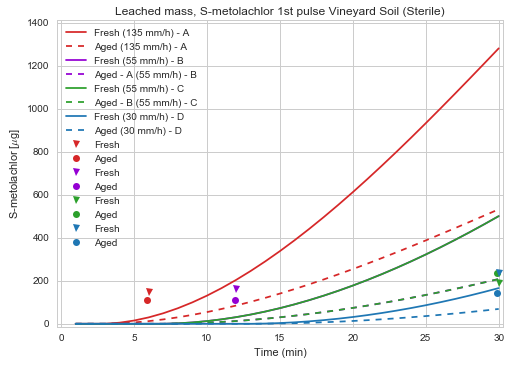

In [15]:
pestiplot_condition(
    mass_percol_sterile1,
    smVn_dict_S_1st,
    'S-metolachlor',
    soil_type='Vineyard Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Vineyard Soil)

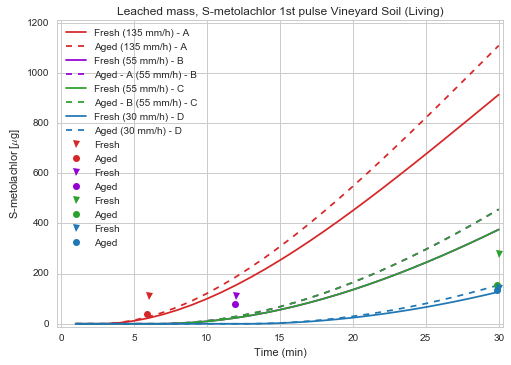

In [16]:
pestiplot_condition(
    mass_percol_living1,
    smVn_dict_L_1st,
    'S-metolachlor',
    soil_type='Vineyard Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

In [17]:
''' Hydrological controlling parameters'''
soil_height2 = 20  # mm

**Observed Percolation - 2nd pulse**

In [18]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([13.309, 0., 7.394, 6.549]) 

# At 12 min, med intensity
leach_med_12min = np.array([0.958, 3.669, 16.06, 12.988]) 

# At 30min, med intensity
leach_med_30min = np.array([0.941, 18.601, 51.834, 29.232])  

# At 30min, low intensity
leach_low_30min = np.array([10.157, 26.737, 27.533, 6.197]) 

**Observed Ponding - 2nd pulse**

In [19]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([8.991, 26.633, 15.720, 19.350])  

# all at 12 min, med intensity
roff_med_12min = np.array([21.193, 17.731, 0.756, 8.025]) 

# all at 30min, med intensity
roff_med_30min = np.array([54.633, 39.350, 0., 23.688])  

# all at 30min, low intensity
roff_low_30min = np.array([13.973, 3.717, 0., 22.827])  

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [20]:
water2_ktest_fresh = leachsim2(
    leach_high_6min, leach_med_12min, leach_med_30min, leach_low_30min,
    kSat = [kSat_vine/25, kSat_vine/50, kSat_vine/100, 
            kSat_vine/125, kSat_vine/140],
    soil_height=soil_height2,
    soil = 'Rouff',
    dtGA = 1,
    AGED = False
)

0.0 5.093170329928398e-11 4.3655745685100555e-11 -7.275957614183426e-12
ksat high:  0.011746666666666667
ksat med12:  0.002936666666666667
ksat med30:  0.011746666666666667
ksat low:  0.011746666666666667


In [21]:
water2_ktest_aged = leachsim2(
    leach_high_6min, leach_med_12min, leach_med_30min, leach_low_30min,
    kSat = [kSat_vine/25, kSat_vine/50, kSat_vine/100, 
            kSat_vine/125, kSat_vine/140],
    soil_height=soil_height2,
    soil = 'Rouff',
    dtGA = 1,
    AGED = True
)

0.0 4.3655745685100555e-11 4.3655745685100555e-11 -7.275957614183426e-12
ksat high:  0.011746666666666667
ksat med12:  0.011746666666666667
ksat med30:  0.011746666666666667
ksat low:  0.011746666666666667


#### Time series fresh

In [22]:
# Time axis
cum_time_30min = water2_ktest_fresh[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_fresh[:, 9]
cum_leach_55mmhA = water2_ktest_fresh[:, 10]
cum_leach_55mmhB = water2_ktest_fresh[:, 11]
cum_leach_30mmh = water2_ktest_fresh[:, 12]

# Group each compartment for graphing
percol_data2_fresh = stackdata4(
    cum_time_30min,
    cum_leach_135mmh, 
    cum_leach_55mmhA, cum_leach_55mmhB, 
    cum_leach_30mmh)

# Ponding fresh
roff_135mmh = water2_ktest_fresh[:, 13]
roff_55mmhA = water2_ktest_fresh[:, 14]
roff_55mmhB = water2_ktest_fresh[:, 15]
roff_30mmh = water2_ktest_fresh[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_fresh[:, 17]
cum_roff_55mmhA = water2_ktest_fresh[:, 18]
cum_roff_55mmhB = water2_ktest_fresh[:, 19]
cum_roff_30mmh = water2_ktest_fresh[:, 20]

runoff_data2_fresh = stackdata4(
    cum_time_30min,
    cum_roff_135mmh, 
    cum_roff_55mmhA, cum_roff_55mmhB, 
    cum_roff_30mmh)

time_size_135mmh = water2_ktest_fresh[:, 25]
time_size_55mmhA = water2_ktest_fresh[:, 26]
time_size_55mmhB = water2_ktest_fresh[:, 27]
time_size_30mmh = water2_ktest_fresh[:, 28]

time_sizes2 = [time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhB, 
               time_size_30mmh]

#### Time series aged

In [23]:
# Time axis
cum_time_30min = water2_ktest_aged[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_aged[:, 9]
cum_leach_55mmhA = water2_ktest_aged[:, 10]
cum_leach_55mmhB = water2_ktest_aged[:, 11]
cum_leach_30mmh = water2_ktest_aged[:, 12]

# Group each compartment for graphing
percol_data2_aged = stackdata4(cum_time_30min,
                               cum_leach_135mmh, 
                               cum_leach_55mmhA, 
                               cum_leach_55mmhB, 
                               cum_leach_30mmh)

# Ponding Aged
roff_135mmh = water2_ktest_aged[:, 13]
roff_55mmhA = water2_ktest_aged[:, 14]
roff_55mmhB = water2_ktest_aged[:, 15]
roff_30mmh = water2_ktest_aged[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_aged[:, 17]
cum_roff_55mmhA = water2_ktest_aged[:, 18]
cum_roff_55mmhB = water2_ktest_aged[:, 19]
cum_roff_30mmh = water2_ktest_aged[:, 20]


runoff_data2_aged = stackdata4(cum_time_30min,
                               cum_roff_135mmh, 
                               cum_roff_55mmhA, 
                               cum_roff_55mmhB, 
                               cum_roff_30mmh)

time_size_135mmh = water2_ktest_aged[:, 25]
time_size_55mmhA = water2_ktest_aged[:, 26]
time_size_55mmhB = water2_ktest_aged[:, 27]
time_size_30mmh = water2_ktest_aged[:, 28]

time_sizes2 = [time_size_135mmh, time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhA, 
               time_size_55mmhB, time_size_55mmhB, 
               time_size_30mmh, time_size_30mmh]

### Percolation & ponding - 2nd pulse (fresh soil)

In [24]:
#hydroplot2(percol_data2_fresh, 
#          "Leached, 135mm/h - A", 
#           "Leached, 55mm/h - B", "Leached, 55mm/h - C", 
#           "Leached, 30mm/h - D",
#          leach_high_6min, 
#          leach_med_12min, leach_med_30min, 
#          leach_low_30min,
#         "Leached Volume [mL] - Vineyard Soil 2nd Pulse",
#          AGED = False)

In [25]:
#hydroplot2(runoff_data2_fresh, 
#          "Ponded, 135mm/h - A", 
#           "Ponded, 55mm/h - B", "Ponded, 55mm/h - C", 
#           "Ponded, 30mm/h - D",
#           roff_high_6min, 
#           roff_med_12min, roff_med_30min, 
#           roff_low_30min,
#           "Ponded Volume [mL] - Vineyard Soil 2nd Pulse",
#           AGED = False)

### Percolation and ponding - 2nd pulse (aged soil)

In [26]:
#hydroplot2(percol_data2_aged,
#           "Leached, 135mm/h - A", 
#           "Leached, 55mm/h - B", "Leached, 55mm/h - C", 
#           "Leached, 30mm/h - D",
#           leach_high_6min, 
#           leach_med_12min, leach_med_30min, 
#           leach_low_30min,
#           "Leached Volume [mL] - Vineyard Soil 2nd Pulse",
#            AGED = True)

In [27]:
#hydroplot2(runoff_data2_aged, 
#          "Ponded, 135mm/h A" , 
#           "Ponded, 55mm/h - B", "Ponded, 55mm/h - C", 
#           "Ponded, 30mm/h - D",
#           roff_high_6min, 
#           roff_med_12min, roff_med_30min, 
#           roff_low_30min,
#           "Ponded Volume [mL] - Vineyard Soil 2nd Pulse",
#            AGED = True)

## Transport - 2nd pulse

** Initial and observed mass in leachate and ponding **

In [28]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs, percolated_vol, roff_vol)

smVn_dict_S_2nd = {
    'a_high_0d': (5206.7, 'nan', 3.5),
    'b_high_1d': (2128.2, 29.1, 3.0),
    'c_med12_0d': (5198.3, 'nan', 9.6),
    'd_med12_1d': (2128.8, 41.1, 'nan'),
    'e_med30_0d': (5177.9, 'nan', 9.8),
    'f_med30_1d': (2038.3, 74.7, 'nan'),
    'g_low_0d': (5142.4, 40.5, 4.6),
    'h_low_1d': (2105.6, 70.2, 'nan')
}

smVn_dict_L_2nd = {
    'a_high_0d': (2841.5, 'nan', 4.2),
    'b_high_1d': (3522.2, 16.1, 2.4),
    'c_med12_0d': (2841.9, 'nan', 3.0),
    'd_med12_1d': (3491.7, 26.3, 2.3),
    'e_med30_0d': (2720.9, 'nan', 1.5),
    'f_med30_1d': (3436.1, 28.5, 2.1),
    'g_low_0d': (2819.6, 77.2, 0.1),
    'h_low_1d': (3451.6, 3.4, 2.5)
}


#### Change in organic matter characterisitics

In [29]:
# ignored...

### Computation mass transfer - S-metolachlor, Vine, 2nd Pulse

#### Kd optimal (sterile)

In [30]:
pest_sterile_2nd = pest_test3(
    Kd_smeto_sterile,
    smVn_dict_S_2nd,
    pb_vine,
    ovSat_vine,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel)


Best log Kd:  3.8782290651098204 ( Num:  1 ) 
 Error:  1.63136861461 , R2:  -3.59940198085
SSres:  43500.64352
SStot:  9457.891200000002
mean mass:  51.120000000000005 sum_mass: 255.60000000000002


#### Kd optimal (living)

In [31]:
pest_living_2nd = pest_test3(
    Kd_smeto_living,
    smVn_dict_L_2nd,
    pb_vine,
    ovSat_vine,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel)


Best log Kd:  3.797321980076107 ( Num:  1 ) 
 Error:  2.76806837623 , R2:  -55.4527491078
SSres:  332979.201755
SStot:  5898.370000000001
mean mass:  30.300000000000004 sum_mass: 151.50000000000003


#### Sterile time series

In [32]:
# Time axis
cum_time_30min = pest_sterile_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_2nd[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_2nd[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_2nd[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_2nd[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_2nd[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_2nd[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_2nd[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_2nd[:, 9]
high_1d_overmass_dt = pest_sterile_2nd[:, 10]
med12_0d_overmass_dt = pest_sterile_2nd[:, 11]
med12_1d_overmass_dt = pest_sterile_2nd[:, 12]

med30_0d_overmass_dt = pest_sterile_2nd[:, 13]
med30_1d_overmass_dt = pest_sterile_2nd[:, 14]
low_0d_overmass_dt = pest_sterile_2nd[:, 15]
low_1d_overmass_dt = pest_sterile_2nd[:, 16]

mass_percol_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)

#### Living time series

In [33]:
# Time axis
cum_time_30min = pest_living_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_living_2nd[:, 1]
high_1d_cum_mass_out_dt = pest_living_2nd[:, 2]

med12_0d_cum_mass_out_dt = pest_living_2nd[:, 3]
med12_1d_cum_mass_out_dt = pest_living_2nd[:, 4]

med30_0d_cum_mass_out_dt = pest_living_2nd[:, 5]
med30_1d_cum_mass_out_dt = pest_living_2nd[:, 6]

low_0d_cum_mass_out_dt = pest_living_2nd[:, 7]
low_1d_cum_mass_out_dt = pest_living_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_2nd[:, 9]
high_1d_overmass_dt = pest_living_2nd[:, 10]
med12_0d_overmass_dt = pest_living_2nd[:, 11]
med12_1d_overmass_dt = pest_living_2nd[:, 12]

med30_0d_overmass_dt = pest_living_2nd[:, 13]
med30_1d_overmass_dt = pest_living_2nd[:, 14]
low_0d_overmass_dt = pest_living_2nd[:, 15]
low_1d_overmass_dt = pest_living_2nd[:, 16]

mass_percol_living2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt,
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt,
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)

## Plotting transport - S-metolachlor

### Sterile (2nd Pulse, Vineyard Soil)

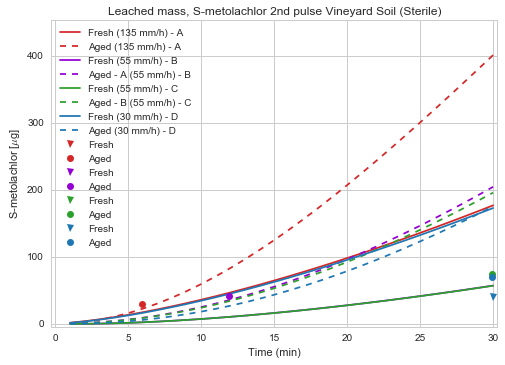

In [34]:
pestiplot_condition(
    mass_percol_sterile2,
    smVn_dict_S_2nd,
    'S-metolachlor',
    soil_type='Vineyard Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

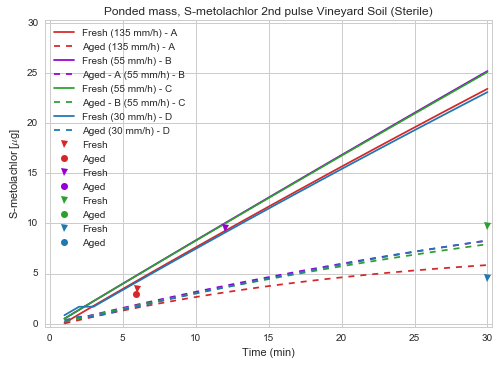

In [35]:
pestiplot_condition(
    mass_pond_sterile2,
    smVn_dict_S_2nd,
    'S-metolachlor',
    soil_type='Vineyard Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse, Vineyard Soil)

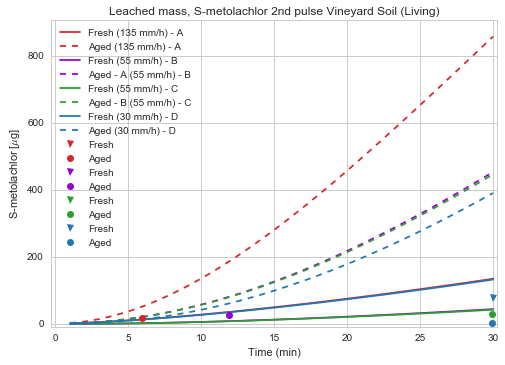

In [36]:
pestiplot_condition(
    mass_percol_living2,
    smVn_dict_L_2nd,
    'S-metolachlor',
    soil_type='Vineyard Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

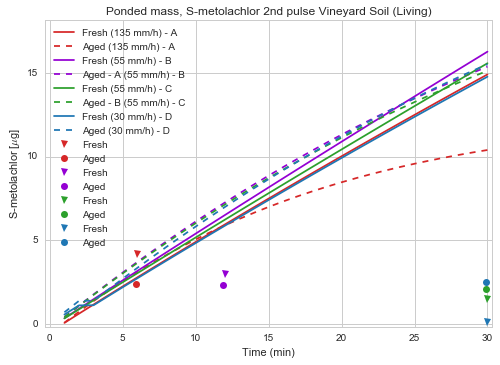

In [37]:
pestiplot_condition(
    mass_pond_living2,
    smVn_dict_L_2nd,
    'S-metolachlor',
    soil_type='Vineyard Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

END NOTEBOOK